# Import Packages 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar
import matplotlib.dates as mdates
from datetime import timedelta


%matplotlib inline

# Import Data

In [2]:
# data folder name
DATA_FOLDER_NAME = 'data/'

# import reservation and visitor data
air_reserve_data = pd.read_csv(DATA_FOLDER_NAME + 'air_reserve.csv')
air_visit_data = pd.read_csv(DATA_FOLDER_NAME + 'air_visit_data.csv')
hpg_reserve_data = pd.read_csv(DATA_FOLDER_NAME + 'hpg_reserve.csv')

# import air & hpg info, store id relationship and date info data
hpg_store_info = pd.read_csv(DATA_FOLDER_NAME + 'hpg_store_info.csv')
air_store_info = pd.read_csv(DATA_FOLDER_NAME + 'air_store_info.csv')
store_id_relation = pd.read_csv(DATA_FOLDER_NAME + 'store_id_relation.csv')
date_info = pd.read_csv(DATA_FOLDER_NAME + 'date_info.csv')

# Total Restaurants

In [3]:
# number of air restaurants
tot_air = len(air_store_info['air_store_id'])

# number of hpg restaurants
tot_hpg = len(hpg_store_info['hpg_store_id'])

# print
print ('Total number of air restaurants: ', tot_air)
print ('Total number of hpg restaurants: ', tot_hpg)

Total number of air restaurants:  829
Total number of hpg restaurants:  4690


# File Summary 

In [4]:
air_reserve_data.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [5]:
# air visit data info
air_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null object
visitors        252108 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [6]:
# air reservation data info
air_reserve_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null object
reserve_datetime    92378 non-null object
reserve_visitors    92378 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [7]:
# hpg reservation data info
hpg_reserve_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000320 entries, 0 to 2000319
Data columns (total 4 columns):
hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors    int64
dtypes: int64(1), object(3)
memory usage: 61.0+ MB


# Data Analysis: Air Visitors 

In [8]:
# air visitors data column
air_visit_data.columns

Index(['air_store_id', 'visit_date', 'visitors'], dtype='object')

In [9]:
# descriptive stats
air_visit_data.describe()

,visitors
count,252108.000000
mean,20.973761
std,16.757007
min,1.000000
25%,9.000000
50%,17.000000
75%,29.000000
max,877.000000


__Observation:__ <p>
- About average 20 visitors (and median 17 visitors) drop by at a restaurant per day, probably most Japanese restaurants have tiny restaurants. 

In [10]:
# join with date info
air_visit_date_data = air_visit_data.join(date_info.set_index('calendar_date'), on='visit_date', how='left')

# add month name into the data frame
air_visit_date_data['month_num'] = pd.to_datetime(air_visit_date_data.visit_date).dt.month
air_visit_date_data['month_name'] = air_visit_date_data['month_num'].apply(lambda x: calendar.month_abbr[x])
air_visit_date_data.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,month_num,month_name
0,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,1,Jan
1,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,1,Jan
2,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,1,Jan
3,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,1,Jan
4,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,1,Jan


Text(0.5, 1.0, 'Total number of air visitors over the period')

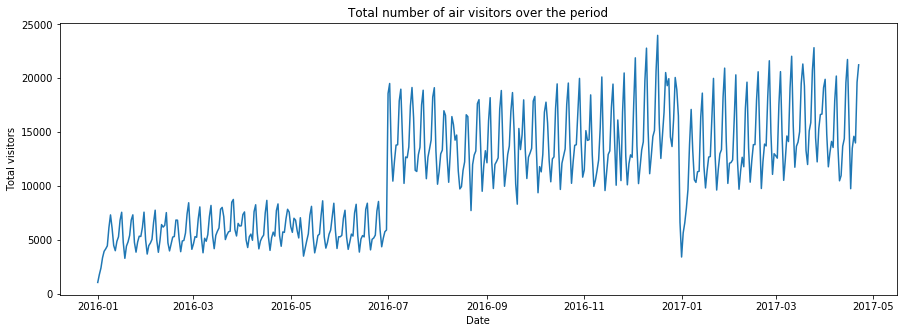

In [11]:
# sum the number of air visitors
tot_visitors = air_visit_date_data.groupby([pd.to_datetime(air_visit_date_data.visit_date).dt.date, 'day_of_week','holiday_flg'])['visitors'].sum().reset_index()

# convert to date time
x_date = pd.to_datetime(tot_visitors.visit_date)

# data frame to plot
visitors_plot = pd.DataFrame()
visitors_plot['visitors'] = tot_visitors['visitors']
visitors_plot['holiday_flg'] = tot_visitors['holiday_flg']
visitors_plot = visitors_plot.set_index(x_date)

# plot number of visitors over the period
plt.figure(figsize=(15,5))
plt.plot(visitors_plot.index, visitors_plot['visitors'])
plt.xlabel('Date')
plt.ylabel('Total visitors')
plt.title('Total number of air visitors over the period')

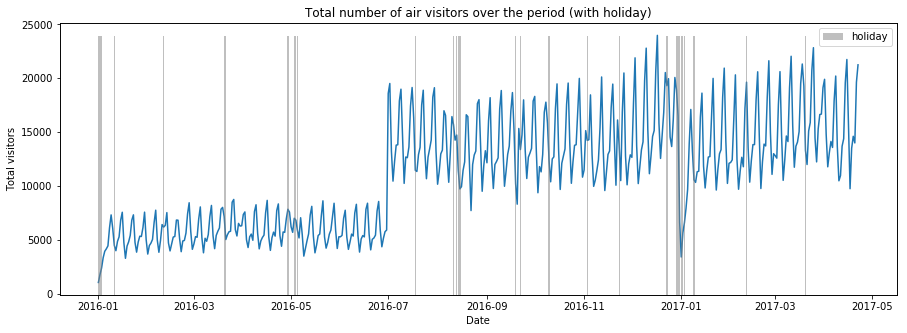

In [12]:
# plot the number of visitors over the period with holidays
fig, ax = plt.subplots(figsize=(15,5))
ax2 = ax.twinx()
ax.plot(visitors_plot.index, visitors_plot['visitors'], label='visitors')
ax2.bar(visitors_plot.index, visitors_plot['holiday_flg'], color='gray', label='holiday', alpha=0.5)
ax.set_xticklabels(visitors_plot.index)
ax2.legend(loc='best')
ax2.axes.get_yaxis().set_visible(False)
ax.set_xlabel('Date')
ax.set_ylabel('Total visitors')
ax.set_title('Total number of air visitors over the period (with holiday)')

# adjust x axis date format
myFmt = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(myFmt)

In [13]:
# total number of holidays over the period
tot_holidays = len(visitors_plot[visitors_plot['holiday_flg']==1])
tot_non_holidays = len(visitors_plot[visitors_plot['holiday_flg']==0])

print ('Total Public Holidays: ', tot_holidays)
print ('Total Non-Public Holidays: ', tot_non_holidays)
print ('Percentage number of holidays in the data: {}%'.format(round(tot_holidays/(tot_holidays + tot_non_holidays)*100,2)))

Total Public Holidays:  31
Total Non-Public Holidays:  447
Percentage number of holidays in the data: 6.49%


__Observations:__ <p>
- There is a huge jump of total number of visitors from july 2016, might be new restaurants added into the database.
- There's a cyclic period.
- In January 2016 and January 2017, the number of visitors plummeted, likely due to many restaurants closes on the first day of January (New Year)
- There are about 6.5% of holidays in the data
- Public holidays do not seem to affect the total visitors that much, the one exception is New Year's day where the number of visitors drop considerably. We will look at the weekly pattern later on and the impact of holiday.

Text(0.5, 1.0, 'Histogram of total visitors per day')

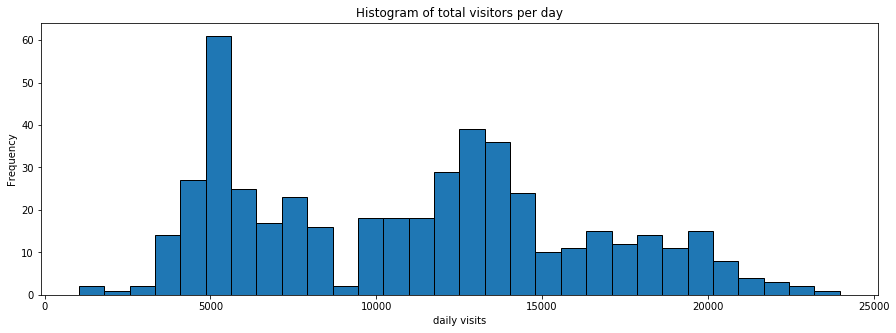

In [14]:
# histogram: frequency of number of visitors per day
plt.figure(figsize=(15,5))
fig = plt.hist(tot_visitors['visitors'],bins=30, edgecolor='black', linewidth=1)
plt.xlabel('daily visits')
plt.ylabel('Frequency')
plt.title('Histogram of total visitors per day')

Text(0.5, 1.0, 'Histogram of daily visits by restaurant')

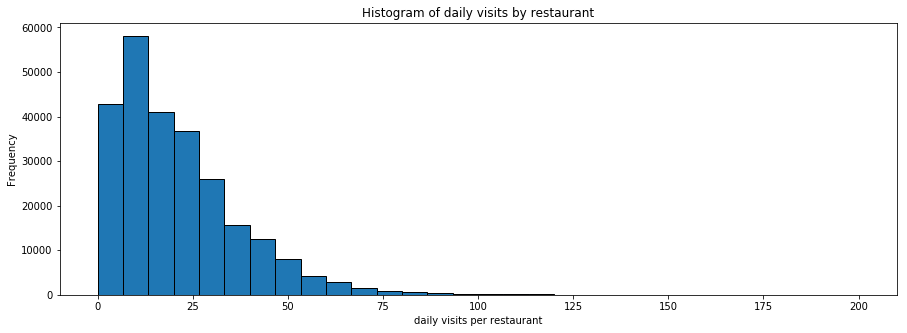

In [15]:
# histogram: frequency of number of visitors per restaurant per day
plt.figure(figsize=(15,5))
fig = plt.hist(air_visit_date_data['visitors'],bins=30, range=[0,200], edgecolor='black', linewidth=1)
plt.xlabel('daily visits per restaurant')
plt.ylabel('Frequency')
plt.title('Histogram of daily visits by restaurant')

__Observations:__ <p>
- histogram: number of visitors each day for a restaurants are usually around 15-20 people

Text(0.5, 1.0, 'Median number of visitors by day of week')

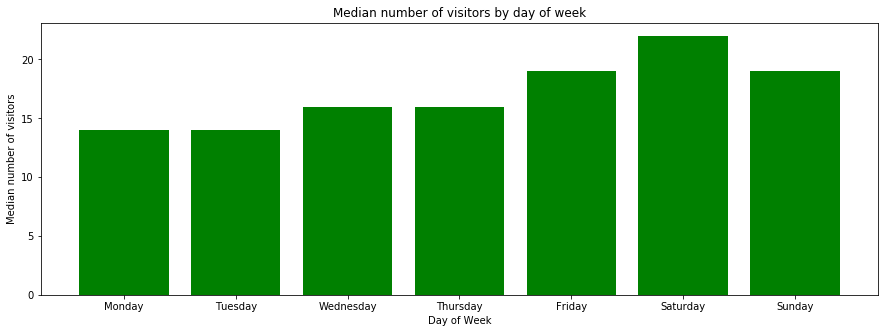

In [16]:
# median number of visitors against each day of week
air_visitors_wk = air_visit_date_data.groupby('day_of_week')['visitors'].median().reset_index()

# reorder  day of week
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = air_visitors_wk['day_of_week'].map(mapping)
air_visitors_wk = air_visitors_wk.iloc[key.argsort()].set_index('day_of_week')


# plot median number of visitors vs day of week
plt.figure(figsize=(15,5))
plt.bar(air_visitors_wk.index, air_visitors_wk['visitors'], color='green')
plt.xlabel('Day of Week')
plt.ylabel('Median number of visitors')
plt.title('Median number of visitors by day of week')

Text(0.5, 1.0, 'Scatter plot of number of visitors by day of week and holiday')

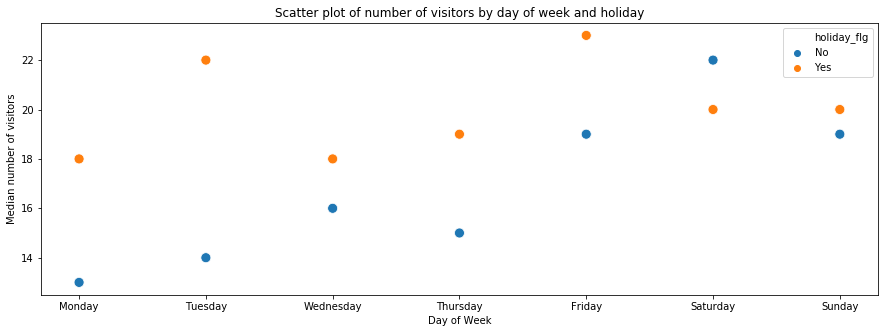

In [17]:
# impact of holidays against each day of week
air_visitors_wk_ph = air_visit_date_data.groupby(['day_of_week','holiday_flg'])['visitors'].median().reset_index()

# convert holiday 1 = yes, 0 = no
air_visitors_wk_ph['holiday_flg'] = air_visitors_wk_ph['holiday_flg'].map({True: 'Yes', False: 'No'})

# reorder by week
key2 = air_visitors_wk_ph['day_of_week'].map(mapping)
air_visitors_wk_ph = air_visitors_wk_ph.iloc[key2.argsort()]#.set_index('day_of_week')

# scatter plot
plt.figure(figsize=(15,5))
sns.scatterplot(data=air_visitors_wk_ph, x='day_of_week', y='visitors', hue='holiday_flg', s=100)
plt.xlabel('Day of Week')
plt.ylabel('Median number of visitors')
plt.title('Scatter plot of number of visitors by day of week and holiday')

Text(0.5, 1.0, 'Median number of visitors by Month')

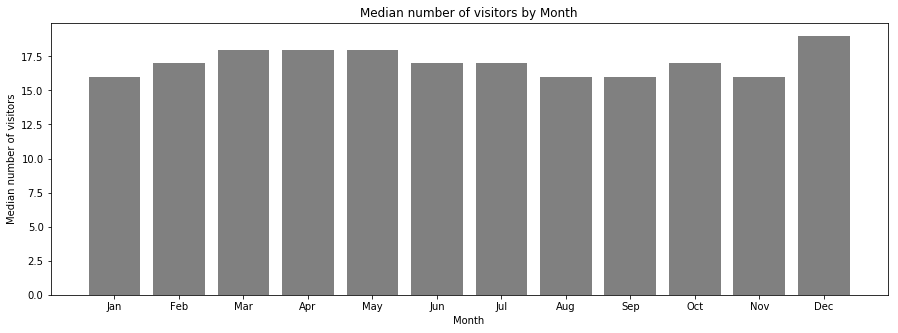

In [18]:
# median number of visitors by month
air_visitors_mth = air_visit_date_data.groupby(['month_num', 'month_name'])['visitors'].median().reset_index()

# plot median number of visitors vs month
plt.figure(figsize=(15,5))
plt.bar(air_visitors_mth['month_name'], air_visitors_mth['visitors'], color='gray')
plt.xlabel('Month')
plt.ylabel('Median number of visitors')
plt.title('Median number of visitors by Month')

__Observations:__ <p>
- Week chart: Friday, Saturday and Sunday have more visitors compare to Monday and Thursday, with steady increase from Friday to Saturday, then reduce down a bit on Sunday.
- Week chart: Monday and Tuesday have the least visitors due to first days of working
- Impact of holiday for weekly pattern: Weekend holidays have little impact to the number of visitors while weekdays holidays have a huge impact, especially Monday and Tuesday.
- Monthly chart: Not much of variation, but could see that there are more visitors from March till June (which is around Summer and Spring) and December has the highest visitors than any other month, could be due to festival.
- Monthly chart: Could indicate that more people go to restaurants during Spring period while they prefer to stay at home in Fall and Winter, except December.

# Data Analysis: Air & HPG Reservations 

In [49]:
# air reservation columns
air_reserve_data.columns

Index(['air_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors', 'visit_date'],
      dtype='object')

In [20]:
# hpg reservation columns
hpg_reserve_data.columns

Index(['hpg_store_id', 'visit_datetime', 'reserve_datetime',
       'reserve_visitors'],
      dtype='object')

In [21]:
# descriptive stats of air reservation per restaurant per day
air_reserve_day_data = air_reserve_data.groupby([pd.to_datetime(air_reserve_data.visit_datetime).dt.date, 'air_store_id'])['reserve_visitors'].sum().reset_index()
air_reserve_day_data.describe()

,reserve_visitors
count,29830.000000
mean,13.879149
std,23.729264
min,1.000000
25%,4.000000
50%,10.000000
75%,18.000000
max,2241.000000


In [22]:
# descriptive stats of hpg reservation per restaurant per day 
hpg_reserve_day_data = hpg_reserve_data.groupby([pd.to_datetime(hpg_reserve_data.visit_datetime).dt.date, 'hpg_store_id'])['reserve_visitors'].sum().reset_index()
hpg_reserve_day_data.describe()

,reserve_visitors
count,1.355053e+06
mean,7.489886e+00
std,8.524270e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,9.000000e+00
max,3.340000e+02


In [23]:
# join with date info for air reserve data
# air visit date
visit_dt = air_reserve_data['visit_datetime'].str.split(" ", n=1, expand=True)
air_reserve_data['visit_date'] = visit_dt[0]
air_reserve_date_data = air_reserve_data.join(date_info.set_index('calendar_date'), on='visit_date', how='left')
air_reserve_date_data.rename(columns={'day_of_week':'visit_day_of_week','holiday_flg':'visit_holiday_flg'}, inplace=True)

# air reserve date
reserve_dt = air_reserve_data['reserve_datetime'].str.split(" ", n=1, expand=True)
air_reserve_date_data['reserve_date'] = reserve_dt[0]
air_reserve_date_data = air_reserve_date_data.join(date_info.set_index('calendar_date'), on='reserve_date', how='left')
air_reserve_date_data.rename(columns={'day_of_week':'reserve_day_of_week','holiday_flg':'reserve_holiday_flg'}, inplace=True)

# hpg visit date
visit_dt_h = hpg_reserve_data['visit_datetime'].str.split(" ", n=1, expand=True)
hpg_reserve_data['visit_date'] = visit_dt_h[0]
hpg_reserve_date_data = hpg_reserve_data.join(date_info.set_index('calendar_date'), on='visit_date', how='left')
hpg_reserve_date_data.rename(columns={'day_of_week':'visit_day_of_week','holiday_flg':'visit_holiday_flg'}, inplace=True)

# hpg reserve date
reserve_dt_h = hpg_reserve_data['reserve_datetime'].str.split(" ", n=1, expand=True)
hpg_reserve_date_data['reserve_date'] = reserve_dt_h[0]
hpg_reserve_date_data = hpg_reserve_date_data.join(date_info.set_index('calendar_date'), on='reserve_date', how='left')
hpg_reserve_date_data.rename(columns={'day_of_week':'reserve_day_of_week','holiday_flg':'reserve_holiday_flg'}, inplace=True)

In [24]:
# air reserve date data structure
air_reserve_date_data.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_date,visit_day_of_week,visit_holiday_flg,reserve_date,reserve_day_of_week,reserve_holiday_flg
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,2016-01-01,Friday,1,2016-01-01,Friday,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,2016-01-01,Friday,1,2016-01-01,Friday,1
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,2016-01-01,Friday,1,2016-01-01,Friday,1
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,2016-01-01,Friday,1,2016-01-01,Friday,1
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,2016-01-01,Friday,1,2016-01-01,Friday,1


In [25]:
# function to plot counts and holiday
def plot_line_bar(count_data, count_data_label, count_data_color, holiday_data, date_data, ylabel_name, title_name):
    # data frame to plot
    data_plot = pd.DataFrame()
    data_plot[0] = count_data
    data_plot[1] = holiday_data
    data_plot = data_plot.set_index(date_data)

    # plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax2 = ax.twinx()
    ax.plot(data_plot.index, data_plot[0], color= count_data_color, label=count_data_label)
    ax2.bar(data_plot.index, data_plot[1], color='gray', label='holiday', alpha=0.5)
    ax.set_xticklabels(data_plot.index)
    ax2.legend(loc='upper right')
    ax2.axes.get_yaxis().set_visible(False)
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel_name)
    ax.set_title(title_name)

    # adjust x axis date format
    myFmt = mdates.DateFormatter("%Y-%m")
    ax.xaxis.set_major_formatter(myFmt)

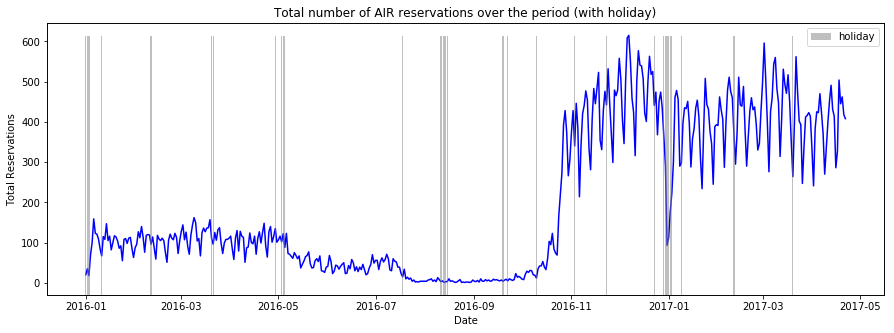

In [26]:
# Total number of air reservation
tot_air_reserve = air_reserve_date_data.groupby(
    [pd.to_datetime(air_reserve_date_data.reserve_date).dt.date, 'reserve_day_of_week','reserve_holiday_flg'])['air_store_id'].count().reset_index()

# convert to date time
air_reserve_date = pd.to_datetime(tot_air_reserve.reserve_date)

# plot number of air reservation
plot_line_bar(tot_air_reserve['air_store_id'], 'reservation', 'blue',tot_air_reserve['reserve_holiday_flg'], air_reserve_date,
              'Total Reservations', 'Total number of AIR reservations over the period (with holiday)')


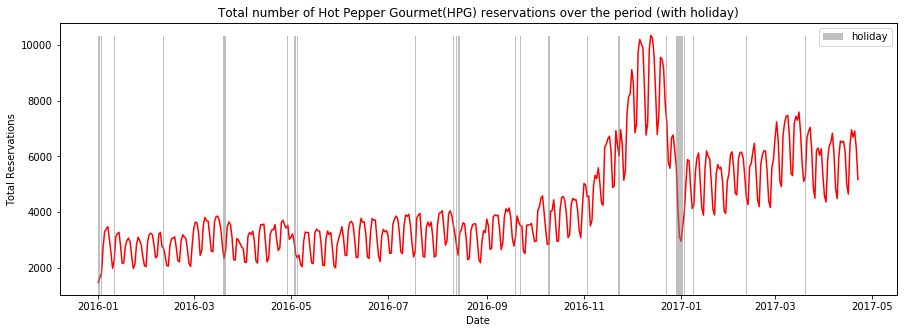

In [27]:
# Total number of hpg reservation
tot_hpg_reserve = hpg_reserve_date_data.groupby(
    [pd.to_datetime(hpg_reserve_date_data.reserve_date).dt.date, 'reserve_day_of_week','reserve_holiday_flg'])['hpg_store_id'].count().reset_index()

# convert to date time
hpg_reserve_date = pd.to_datetime(tot_hpg_reserve.reserve_date)

# plot number of air reservation
plot_line_bar(tot_hpg_reserve['hpg_store_id'], 'reservation', 'red',tot_hpg_reserve['reserve_holiday_flg'], hpg_reserve_date,
              'Total Reservations', 'Total number of Hot Pepper Gourmet(HPG) reservations over the period (with holiday)')

__Observations:__ <p>
- From both graphs, there are more reservations that are made via Hot Pepper Gourmet(HPG) than Air.
- There are much fewer reservations made in 2016. Reservations via Air during mid July 2016 to October 2016 are close to 0.
- There is a huge increase number of reservations in November 2016 made through HPG before it back off from the start of year in 2017, this could be due to the end of year celebration.
- There is little to no reservations at New Year.

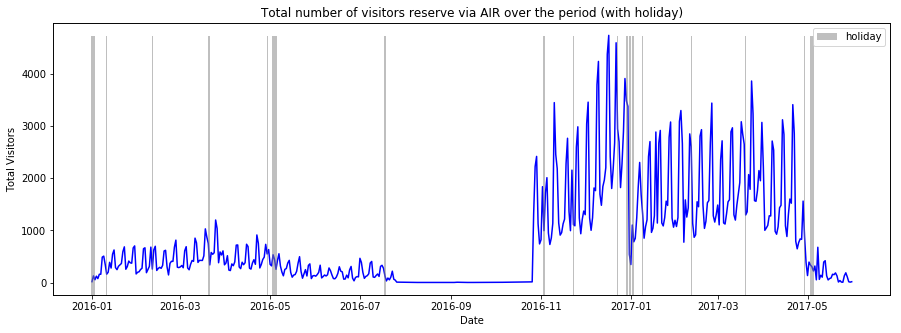

In [28]:
# Total number of air reservation visitors
tot_air_reserveV = air_reserve_date_data.groupby(
    [pd.to_datetime(air_reserve_date_data.visit_date).dt.date, 'visit_day_of_week','visit_holiday_flg'])['reserve_visitors'].sum().reset_index()

# convert to date time
air_reserveV_date = pd.to_datetime(tot_air_reserveV.visit_date)

# plot number of air reservation
plot_line_bar(tot_air_reserveV['reserve_visitors'], 'reserve visitors','blue',tot_air_reserveV['visit_holiday_flg'], air_reserveV_date,
              'Total Visitors', 'Total number of visitors reserve via AIR over the period (with holiday)')

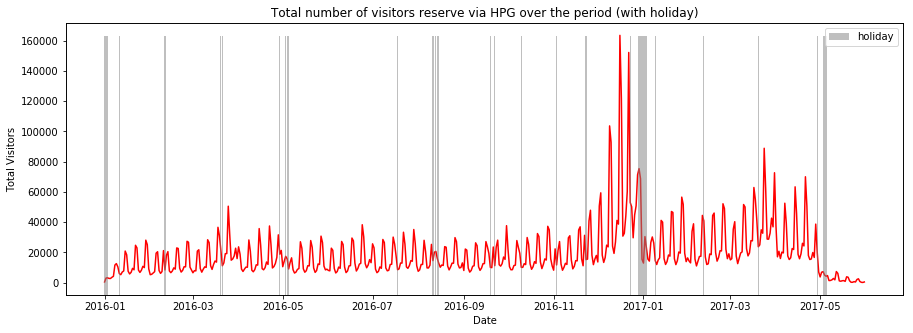

In [29]:
# Total number of hpg reservation visitors
tot_hpg_reserveV = hpg_reserve_date_data.groupby(
    [pd.to_datetime(hpg_reserve_date_data.visit_date).dt.date, 'visit_day_of_week','visit_holiday_flg'])['reserve_visitors'].sum().reset_index()

# convert to date time
hpg_reserveV_date = pd.to_datetime(tot_hpg_reserveV.visit_date)

# plot number of air reservation
plot_line_bar(tot_hpg_reserveV['reserve_visitors'], 'reserve visitors','red',tot_hpg_reserveV['visit_holiday_flg'], hpg_reserveV_date,
              'Total Visitors', 'Total number of visitors reserve via HPG over the period (with holiday)')

__Observations:__ <p>
- There are no visitors that made reservation via AIR from August 2016 until the end of October 2016, likely missing data?
- HPG reservation based visitors have consistent visitors, the number of visitors increases at the end of the year and back down again from the start of year.

Text(0.5, 1.0, 'Histogram of the reservation size reserve via Air')

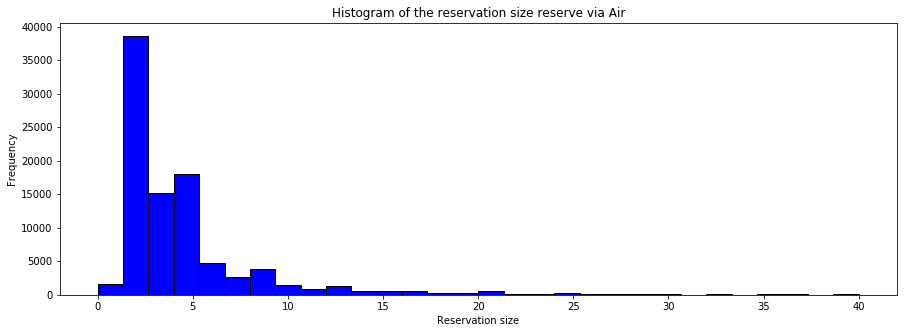

In [30]:
# Reservation size
# histogram of reservation size via air
plt.figure(figsize=(15,5))
fig = plt.hist(air_reserve_date_data['reserve_visitors'],bins=30, range=(0,40), color='blue', edgecolor='black', linewidth=1)
plt.xlabel('Reservation size')
plt.ylabel('Frequency')
plt.title('Histogram of the reservation size reserve via Air')

Text(0.5, 1.0, 'Histogram of the reservation size reserve via Air')

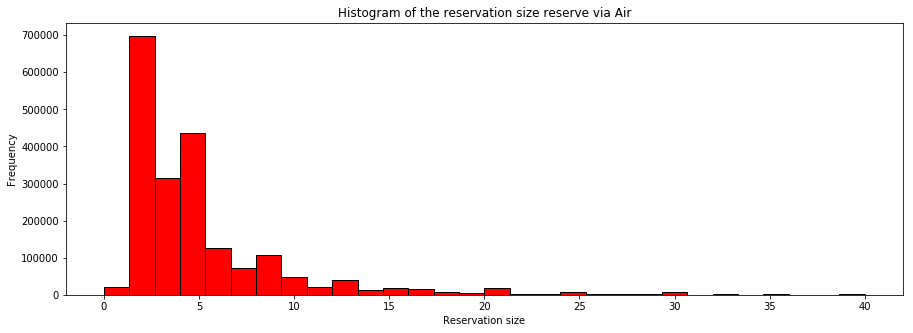

In [31]:
# histogram of reservation size via hpg
plt.figure(figsize=(15,5))
fig = plt.hist(hpg_reserve_date_data['reserve_visitors'],bins=30, range=(0,40), color='red', edgecolor='black', linewidth=1)
plt.xlabel('Reservation size')
plt.ylabel('Frequency')
plt.title('Histogram of the reservation size reserve via Air')

__Observations:__ <p>
- From the distribution, majority of people who uses air and hpg reserve a table for 5 or less.

Text(0.5, 1.0, 'Histogram of the difference between reservation time and visit time for Air reserve visitors')

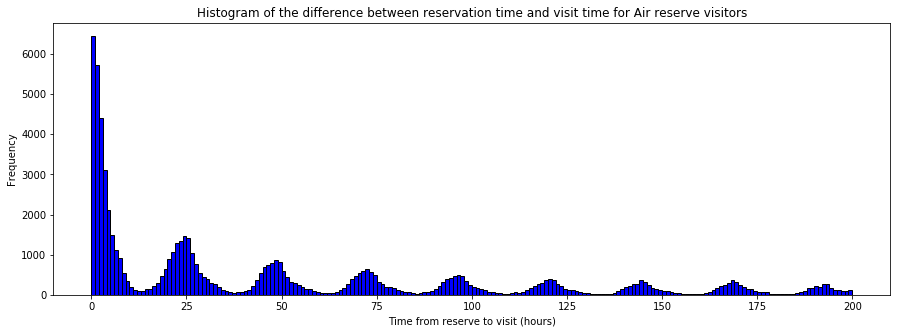

In [32]:
# time from reservation to visit for air reservation.
air_time_reserve_to_visit_hr = pd.to_datetime(air_reserve_date_data.visit_datetime) - pd.to_datetime(air_reserve_date_data.reserve_datetime)
air_time_reserve_to_visit_hr = air_time_reserve_to_visit_hr/timedelta(hours=1)
air_reserve_date_data['reserve_to_visit_time_hr'] = air_time_reserve_to_visit_hr

# histogram
plt.figure(figsize=(15,5))
fig = plt.hist(air_reserve_date_data['reserve_to_visit_time_hr'],bins=200, range=(0,200), color='blue', edgecolor='black', linewidth=1)
plt.xlabel('Time from reserve to visit (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of the difference between reservation time and visit time for Air reserve visitors')

Text(0.5, 1.0, 'Histogram of the difference between reservation time and visit time for HPG reserve visitors')

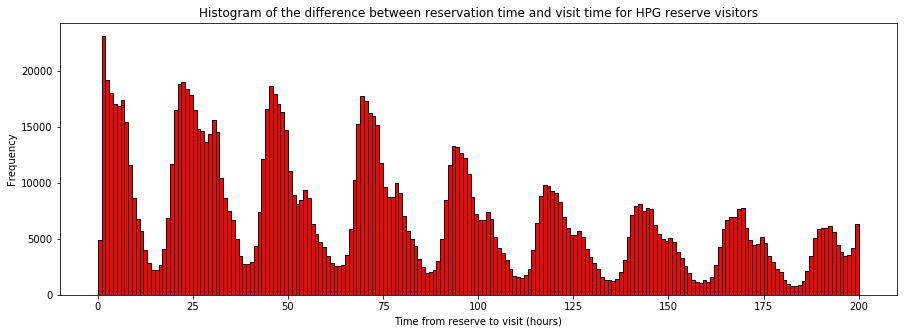

In [33]:
# time from reservation to visit for hpg reservation.
hpg_time_reserve_to_visit_hr = pd.to_datetime(hpg_reserve_date_data.visit_datetime) - pd.to_datetime(hpg_reserve_date_data.reserve_datetime)
hpg_time_reserve_to_visit_hr = hpg_time_reserve_to_visit_hr/timedelta(hours=1)
hpg_reserve_date_data['reserve_to_visit_time_hr'] = hpg_time_reserve_to_visit_hr

# histogram
plt.figure(figsize=(15,5))
fig = plt.hist(hpg_reserve_date_data['reserve_to_visit_time_hr'],bins=200, range=(0,200), color='red', edgecolor='black', linewidth=1)
plt.xlabel('Time from reserve to visit (hours)')
plt.ylabel('Frequency')
plt.title('Histogram of the difference between reservation time and visit time for HPG reserve visitors')

__Observations:__ <p>
- From the distribution, we can say that most people make reservations within 1-2 days before visiting the restaurant, most people make reservations on the day (few hours before).
- Through hpg system, there aren't a lot of difference between people who reserve a few hours ahead and people who reserve 24 hours or more ahead, which is a huge contrast to people who reserve restaurants via air system. Majoity of air users book less than 24 hours ahead.  

# Data Analysis: Air & HPG Stores 

In [34]:
# air store info data structure
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [35]:

# join air store info with air visit data and date info
air_visit_info_data = air_visit_data.join(air_store_info.set_index('air_store_id'), on='air_store_id', how='left')
air_visit_info_data = air_visit_info_data.join(date_info.set_index('calendar_date'), on='visit_date', how='left')
air_visit_info_data.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Wednesday,0
1,air_ba937bf13d40fb24,2016-01-14,32,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Thursday,0
2,air_ba937bf13d40fb24,2016-01-15,29,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Friday,0
3,air_ba937bf13d40fb24,2016-01-16,22,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Saturday,0
4,air_ba937bf13d40fb24,2016-01-18,6,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Monday,0


In [36]:
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


Text(0.5, 1.0, 'Most common Air Restaurants by Genre')

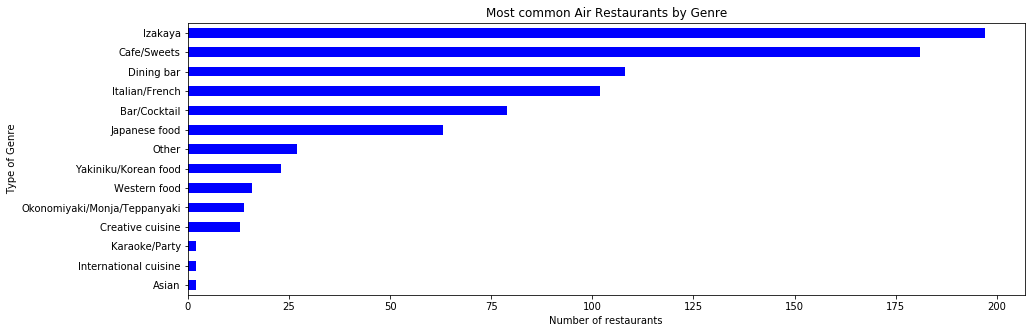

In [37]:
# number of restaurants in Air by Genre
air_tot_genre_stores = air_store_info['air_genre_name'].value_counts()

# plot horizontal bar
plt.figure(figsize=(15,5))
ax = air_tot_genre_stores.iloc[:].plot(kind="barh", color='blue')
ax.invert_yaxis()
ax.set_xlabel('Number of restaurants')
ax.set_ylabel('Type of Genre')
ax.set_title('Most common Air Restaurants by Genre')

Text(0.5, 1.0, 'Most Common HPG Restaurants by Genre')

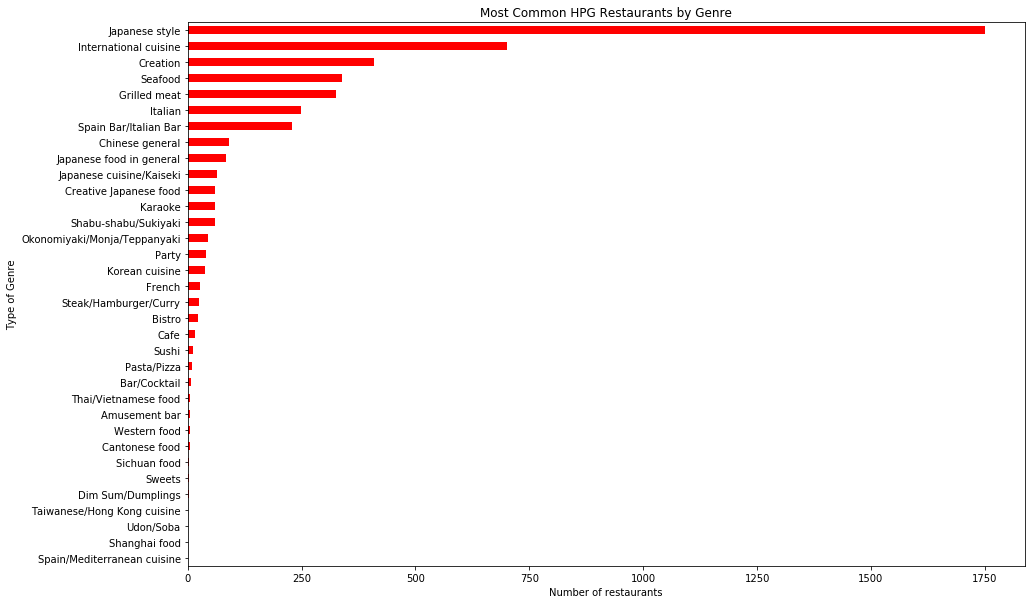

In [38]:
# number of restaurants in HPG by Genre
hpg_tot_genre_stores = hpg_store_info['hpg_genre_name'].value_counts()

# plot horizontal bar
plt.figure(figsize=(15,10))
ax = hpg_tot_genre_stores.iloc[:].plot(kind="barh", color='red')
ax.invert_yaxis()
ax.set_xlabel('Number of restaurants')
ax.set_ylabel('Type of Genre')
ax.set_title('Most Common HPG Restaurants by Genre')

__Observations:__ <p>
- The most common restaurant in HPG is Japanese style while the most common restaurant in Air is Izakaya (a pub)
- International cuisine type restaurant is one of the most common restaurant in HPG, a huge contrast to air, which has the least common restaurant.

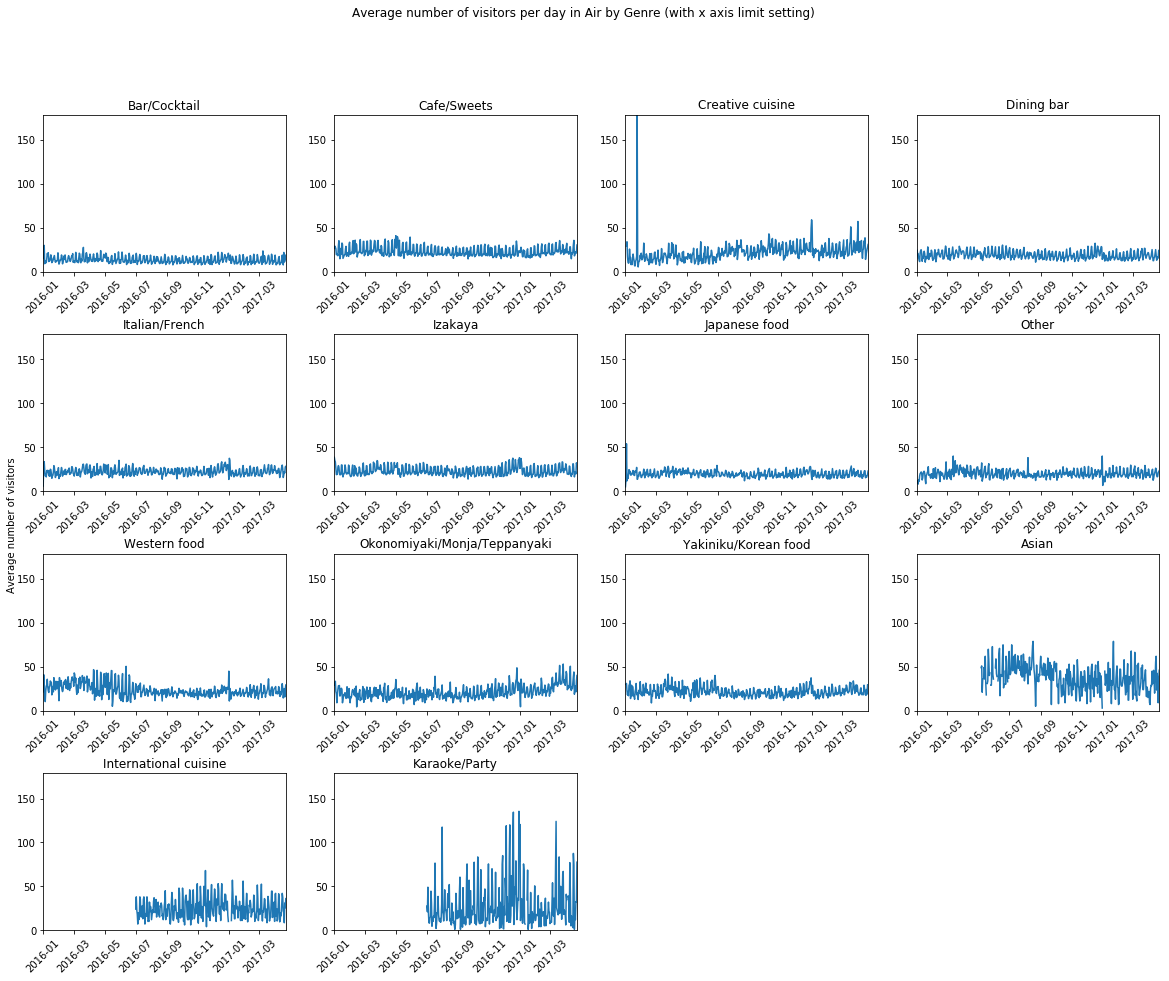

In [39]:
# Average number of visitors per day in air restaurants by genre
air_avg_visit_genre = air_visit_info_data.groupby(
    [pd.to_datetime(air_visit_info_data.visit_date).dt.date, 'air_genre_name'])['visitors'].mean().reset_index()

# maximum average number of visitors 
max_avg_visitors = max(air_avg_visit_genre['visitors'])

# list of genre in air
air_genre_list = air_avg_visit_genre['air_genre_name'].unique()

# list of available date
air_genre_date = air_avg_visit_genre['visit_date'].drop_duplicates()
air_genre_date = pd.DataFrame({'visit_date':air_genre_date})

# plot subplots
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.suptitle('Average number of visitors per day in Air by Genre (with x axis limit setting)')
fig.text(0.1, 0.5, 'Average number of visitors', va='center', rotation='vertical')

for i,gen in enumerate(air_genre_list):
    data_lp = air_avg_visit_genre[air_avg_visit_genre['air_genre_name']==gen]
    data_to_plot = air_genre_date.join(data_lp.set_index('visit_date'), on='visit_date', how='left')
    ax = fig.add_subplot(4, 4, i+1)
    ax.plot(data_to_plot.visit_date, data_to_plot.visitors)
    ax.set_xlim(data_to_plot.visit_date[0],data_to_plot.visit_date[max(data_to_plot.index)])
    ax.set_ylim(0,max_avg_visitors)
    ax.set_title(gen)
    plt.xticks(rotation=45)

c:\program files\python\python35\lib\site-packages\matplotlib\axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


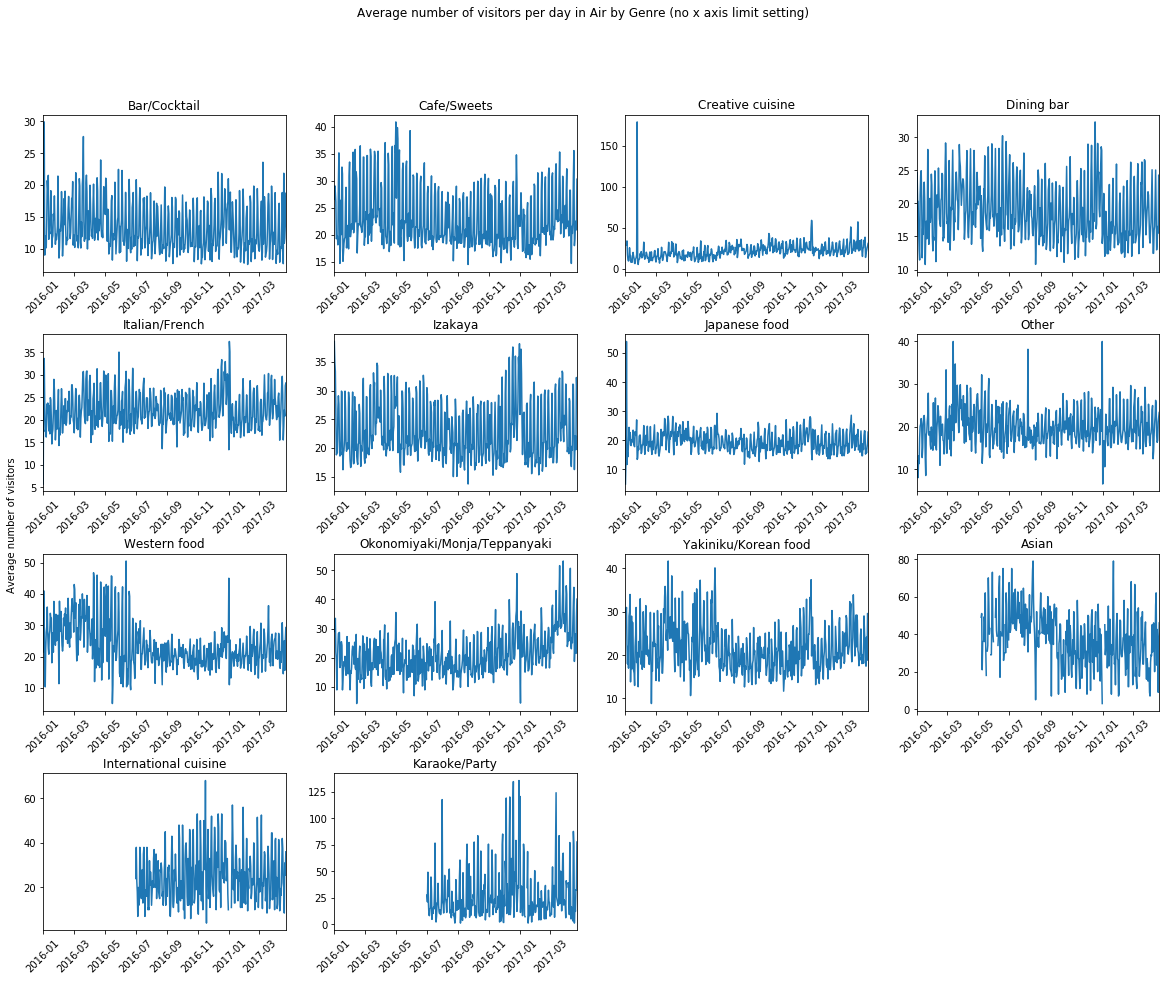

In [40]:
# plot average number of visitors without setting y limits
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.suptitle('Average number of visitors per day in Air by Genre (no x axis limit setting)')
fig.text(0.1, 0.5, 'Average number of visitors', va='center', rotation='vertical')

for i,gen in enumerate(air_genre_list):
    data_lp = air_avg_visit_genre[air_avg_visit_genre['air_genre_name']==gen]
    data_to_plot = air_genre_date.join(data_lp.set_index('visit_date'), on='visit_date', how='left')
    ax = fig.add_subplot(4, 4, i+1)
    ax.plot(data_to_plot.visit_date, data_to_plot.visitors)
    ax.set_xlim(data_to_plot.visit_date[0],data_to_plot.visit_date[max(data_to_plot.index)])
    ax.set_title(gen)
    plt.xticks(rotation=45)

__Observations:__ <p>
- Looking at the breakdown of average number of visitors per day in air restaurants by genre (with and without x limit settings), most of the genre have steady customers, with a few exceptions.
- Number of customers visting Karaoke/Party restaurants varies across the period, could depend on seasons 
- Majority type of restaurants have more visitors at the end of the year 
- Asian cuisine, International cuisine and Karaoke/Party restaurants data before July 2016 are missing, which could explains why there is a huge jump of number of visitors from the earlier graph. Judging from the previous graph which shows the most common type of restaurants, they are probably new restaurants added into the system.

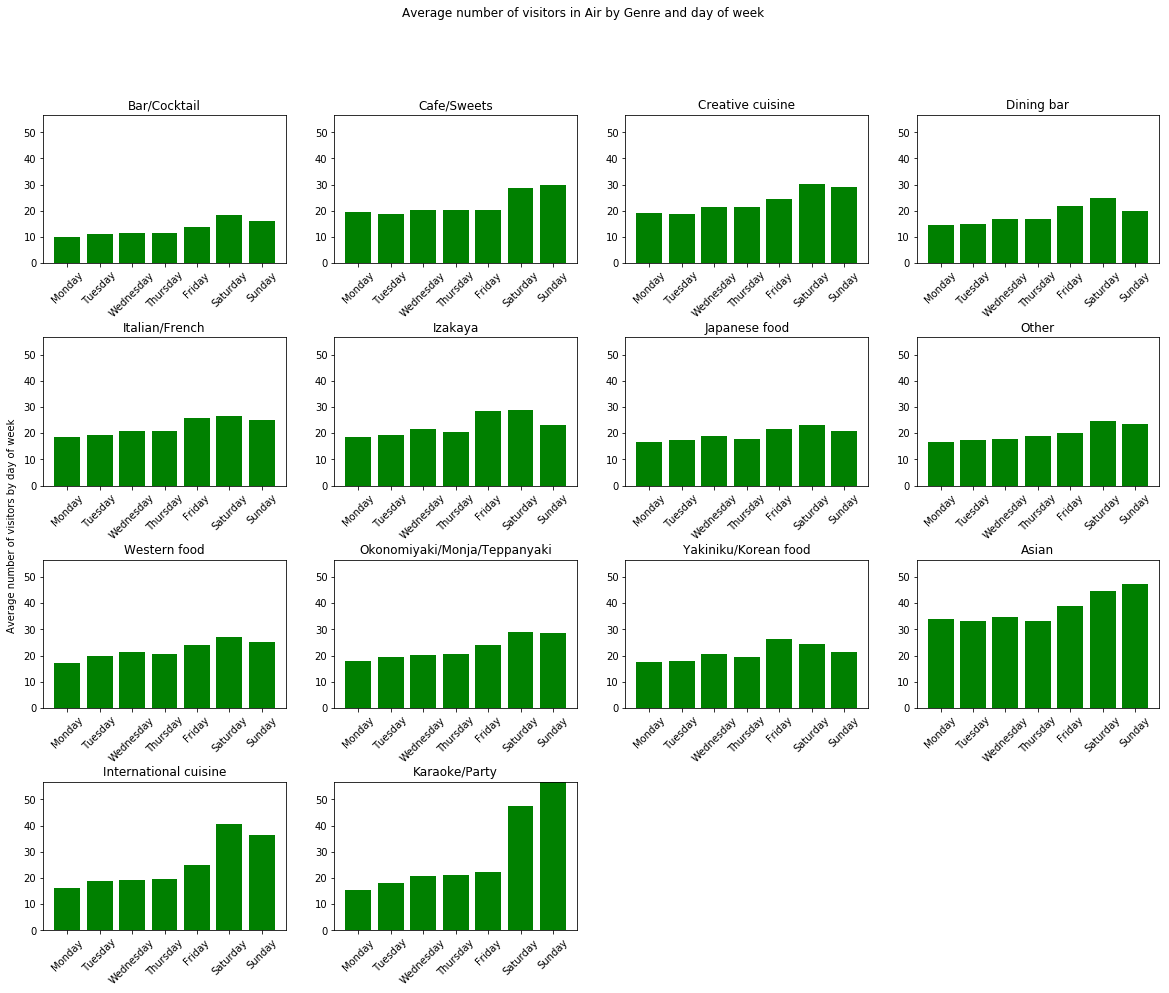

In [41]:
# Average number of visitors per day in air restaurants by genre and day of week
air_avg_wk_visit_genre = air_visit_info_data.groupby(
    ['day_of_week', 'air_genre_name'])['visitors'].mean().reset_index()

# reorder day of week
key2 = air_avg_wk_visit_genre['day_of_week'].map(mapping)
air_avg_wk_visit_genre = air_avg_wk_visit_genre.iloc[key2.argsort()].set_index('day_of_week')

# maximum average number of visitors by day of week
max_avg_wk_visitors = max(air_avg_wk_visit_genre['visitors'])

# list of genre in air
air_genre_list = air_avg_visit_genre['air_genre_name'].unique()

# plot subplots
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.suptitle('Average number of visitors in Air by Genre and day of week')
fig.text(0.1, 0.5, 'Average number of visitors by day of week', va='center', rotation='vertical')

for i,gen in enumerate(air_genre_list):
    data_to_plot = air_avg_wk_visit_genre[air_avg_wk_visit_genre['air_genre_name']==gen]
    ax = fig.add_subplot(4, 4, i+1)
    ax.bar(data_to_plot.index, data_to_plot.visitors, color='green')
    ax.set_ylim(0,max_avg_wk_visitors)
    ax.set_title(gen)
    plt.xticks(rotation=45)


__Observations__: <p>
- All types of restaurants have shown an increase number of customers on Friday and weekend.
- Asian cuisine, International cuisine and Karaoke/Party restaurants have the highest amount of customers on weekends. Karaoke/Party restaurant customers increase dramatically on weekends. 

Text(0.5, 1.0, 'Top 20 Areas in Air')

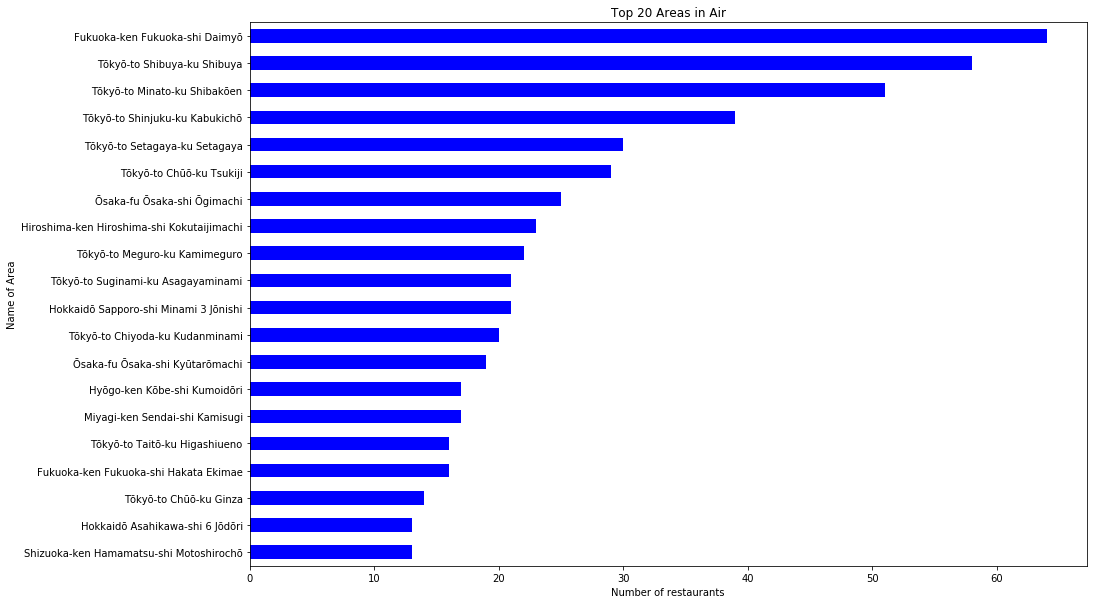

In [50]:
# number of restaurants in Air by areas
air_tot_area_stores = air_store_info['air_area_name'].value_counts()

# plot horizontal bar
plt.figure(figsize=(15,10))
ax = air_tot_area_stores.iloc[:20].plot(kind="barh", color='blue')
ax.invert_yaxis()
ax.set_xlabel('Number of restaurants')
ax.set_ylabel('Name of Area')
ax.set_title('Top 20 Areas in Air')

Text(0.5, 1.0, 'Top 20 Areas in HPG')

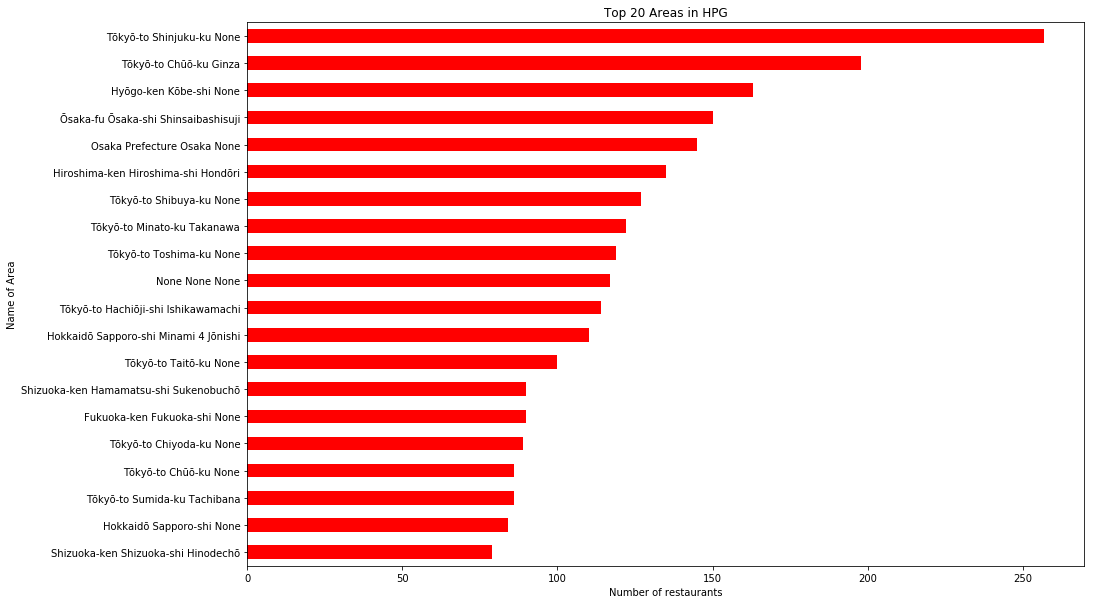

In [51]:
# number of restaurants in Air by areas
hpg_tot_area_stores = hpg_store_info['hpg_area_name'].value_counts()

# plot horizontal bar
plt.figure(figsize=(15,10))
ax = hpg_tot_area_stores.iloc[:20].plot(kind="barh", color='red')
ax.invert_yaxis()
ax.set_xlabel('Number of restaurants')
ax.set_ylabel('Name of Area')
ax.set_title('Top 20 Areas in HPG')

__Observations:__ <p>
- Looking at both bar charts by area, Tokyo-to seems to have the most restaurants.

In [44]:
# add prefectures into air store info 
air_visit_pre = air_store_info['air_area_name'].str.split(" ", n=1, expand=True)
air_store_info['Prefecture'] = air_visit_pre[0]

# add prefectures into hpg store info 
hpg_visit_pre = hpg_store_info['hpg_area_name'].str.split(" ", n=1, expand=True)
hpg_store_info['Prefecture'] = hpg_visit_pre[0]

# add prefectures into air visit data 
air_visit_info_pre = air_visit_info_data['air_area_name'].str.split(" ", n=1, expand=True)
air_visit_info_data['Prefecture'] = air_visit_info_pre[0]

Text(0.5, 1.0, 'Number of Restaurants in Air by Prefectures')

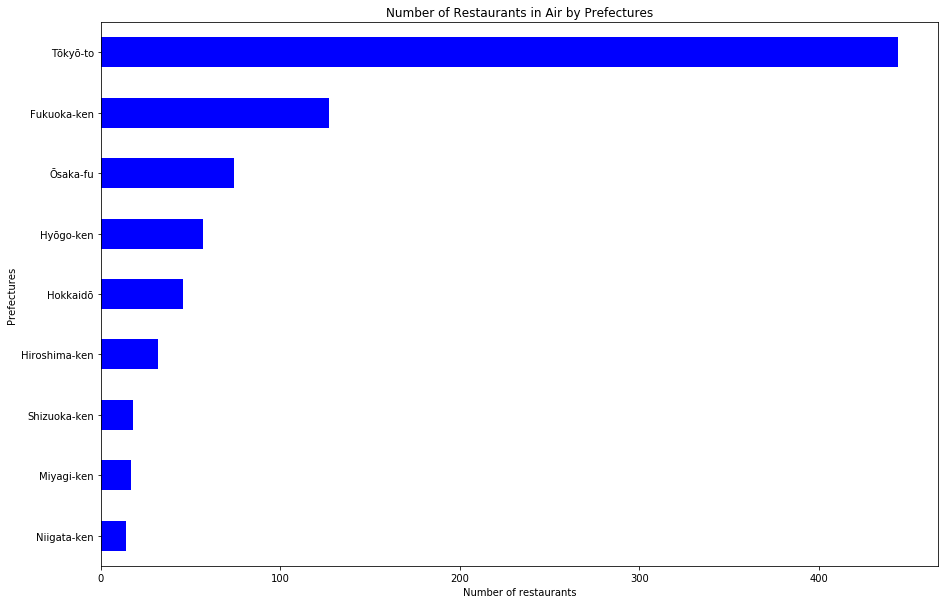

In [45]:
# count number of air restaurants by prefectures 
air_tot_pref_stores = air_store_info['Prefecture'].value_counts()

# plot horizontal bar
plt.figure(figsize=(15,10))
ax = air_tot_pref_stores.iloc[:].plot(kind="barh", color='blue')
ax.invert_yaxis()
ax.set_xlabel('Number of restaurants')
ax.set_ylabel('Prefectures')
ax.set_title('Number of Restaurants in Air by Prefectures')

Text(0.5, 1.0, 'Number of Restaurants in HPG by Prefectures')

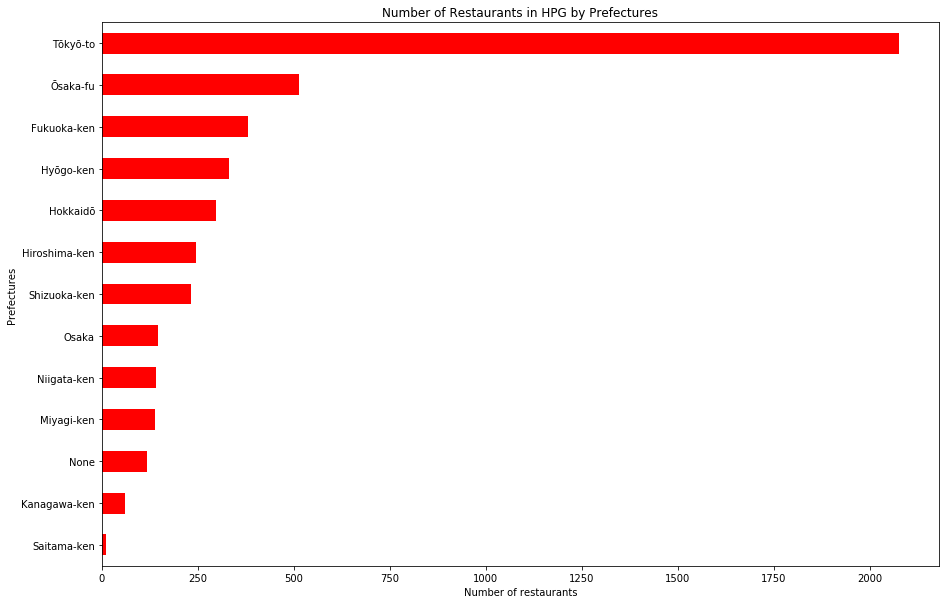

In [46]:
# count number of hpg restaurants by prefectures
hpg_tot_pref_stores = hpg_store_info['Prefecture'].value_counts()

# plot horizontal bar
plt.figure(figsize=(15,10))
ax = hpg_tot_pref_stores.iloc[:].plot(kind="barh", color='red')
ax.invert_yaxis()
ax.set_xlabel('Number of restaurants')
ax.set_ylabel('Prefectures')
ax.set_title('Number of Restaurants in HPG by Prefectures')

__Observations:__ <p>
- There are 9 prefectures in air system and 13 prefectures in hpg system.
- In both cases, Tokyo-to has the highest amount of restaurants.
- Osaka-fu and Fukuoka-ken has the 2nd and 3rd highest amount of restaurants.

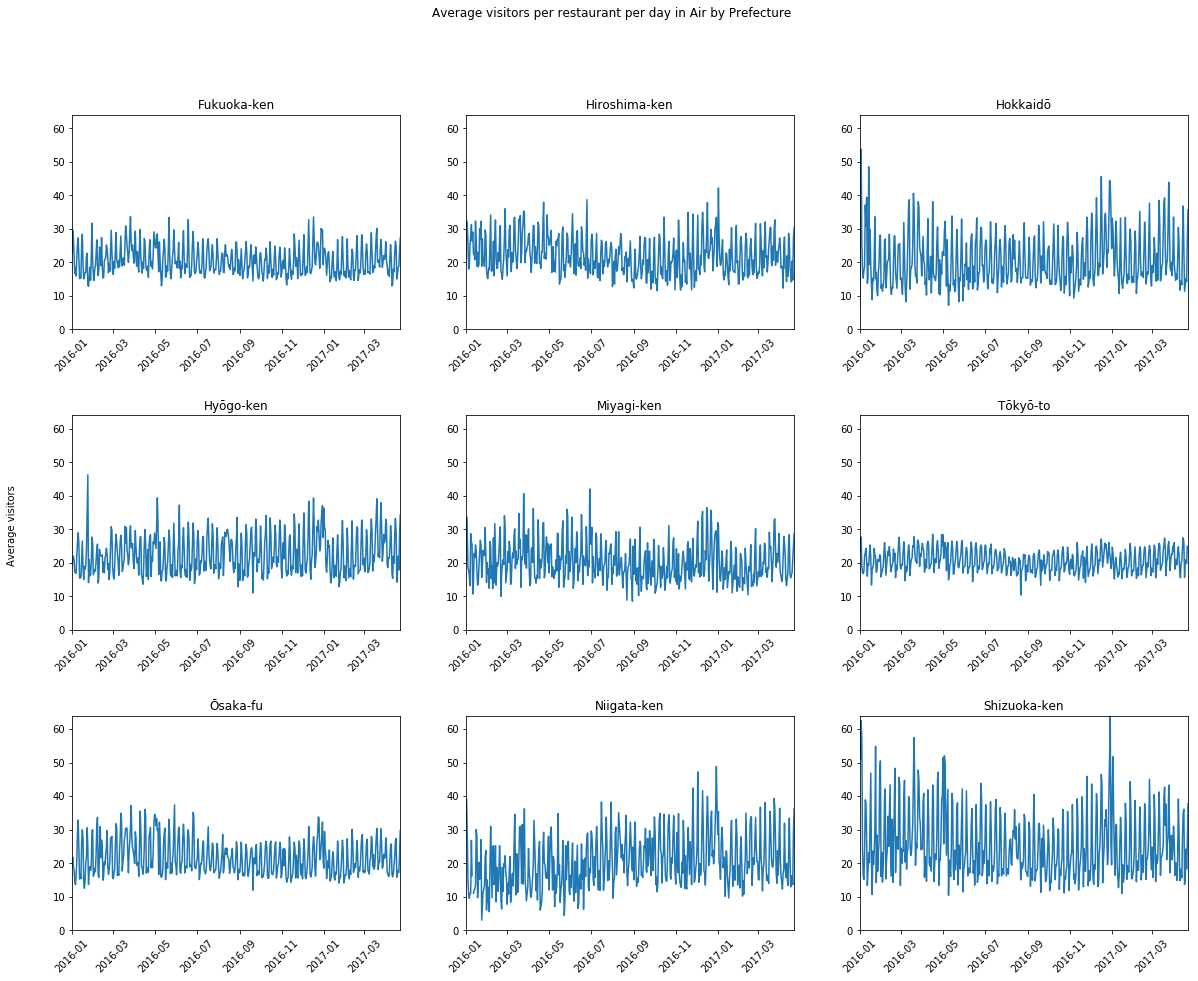

In [47]:
# Total visitors per day in air restaurants by Prefecture
air_avg_visit_pref = air_visit_info_data.groupby(
    [pd.to_datetime(air_visit_info_data.visit_date).dt.date, 'Prefecture'])['visitors'].mean().reset_index()


# maximum number of visitors 
max_avg_visitors = max(air_avg_visit_pref['visitors'])

# list of prefectures
air_pref_list = air_avg_visit_pref['Prefecture'].unique()

# list of available date
air_pref_date = air_avg_visit_pref['visit_date'].drop_duplicates()
air_pref_date = pd.DataFrame({'visit_date':air_pref_date})

# plot subplots
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
fig.suptitle('Average visitors per restaurant per day in Air by Prefecture')
fig.text(0.08, 0.5, 'Average visitors', va='center', rotation='vertical')

for i,pre in enumerate(air_pref_list):
    data_lp = air_avg_visit_pref[air_avg_visit_pref['Prefecture']==pre]
    data_to_plot = air_pref_date.join(data_lp.set_index('visit_date'), on='visit_date', how='left')
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(data_to_plot.visit_date, data_to_plot.visitors)
    ax.set_xlim(data_to_plot.visit_date[0],data_to_plot.visit_date[max(data_to_plot.index)])
    ax.set_ylim(0,max_avg_visitors)
    ax.set_title(pre)
    plt.xticks(rotation=45)

__Observations:__ <p>
- Tokyo-to, Osaka-fu and Fukuaka-ken, 3 of the highest number of restaurants seems to have the most consistent amount of visitors per day.
- daily visitors for Shizuoka-ken, Niigata-ken and Hokkaido restaurants seems to varies across the period, likely depends on weekdays and seasons.

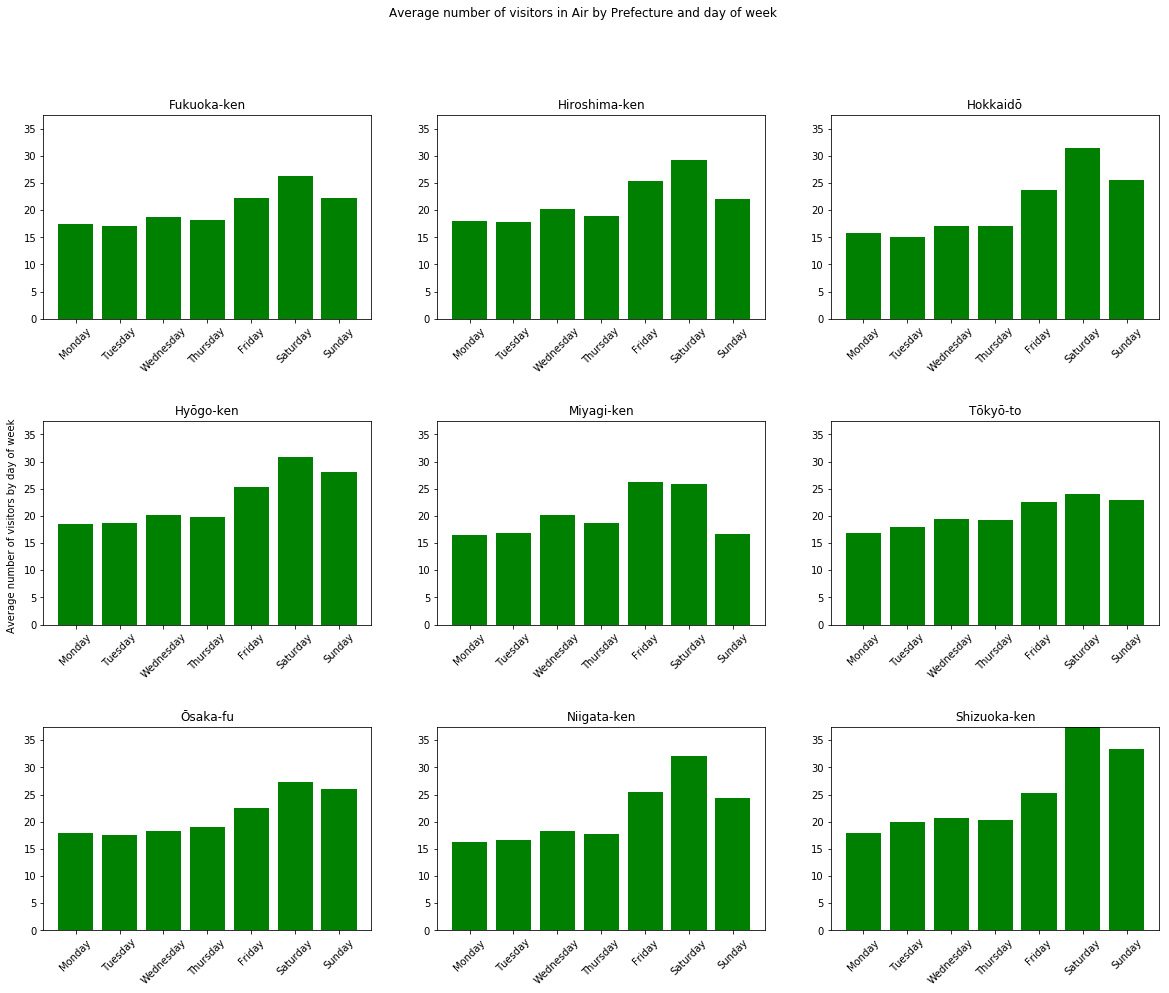

In [48]:
# Average number of visitors per day in air restaurants by prefecture and day of week
air_avg_wk_visit_pref = air_visit_info_data.groupby(
    ['day_of_week', 'Prefecture'])['visitors'].mean().reset_index()

# reorder day of week
key3 = air_avg_wk_visit_pref['day_of_week'].map(mapping)
air_avg_wk_visit_pref = air_avg_wk_visit_pref.iloc[key3.argsort()].set_index('day_of_week')

# maximum average number of visitors by day of week
max_avg_wk_visitors = max(air_avg_wk_visit_pref['visitors'])

# plot subplots
fig = plt.figure(figsize=(20,15))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
fig.suptitle('Average number of visitors in Air by Prefecture and day of week')
fig.text(0.1, 0.5, 'Average number of visitors by day of week', va='center', rotation='vertical')

for i,pre in enumerate(air_pref_list):
    data_to_plot = air_avg_wk_visit_pref[air_avg_wk_visit_pref['Prefecture']==pre]
    ax = fig.add_subplot(3, 3, i+1)
    ax.bar(data_to_plot.index, data_to_plot.visitors, color='green')
    ax.set_ylim(0,max_avg_wk_visitors)
    ax.set_title(pre)
    plt.xticks(rotation=45)

__Observations__:  <p>
- As expected, restaurants in all prefecture have high amount of visitors on weekends compare to weekdays. 
- Daily visitors for Shizuoka-ken and Niigata-ken restaurant increases significantly on weekends.
- Daily visitors for Tokyo-to restaurant has a slight increase on weekends.

## Conclusion:

- There is a huge step up of number of visitors from July 2016 onwards, this could be due to new restaurants being added into the system.
- There is a weekly pattern that affects the number of visitors, with Friday, Saturday and Sunday appear to be the most popular days to visit restaurants, while the start of the weekdays (Monday and Tuesday) are the least popular days to visit.
- Weekend public holidays does not have a lot of impact to the number of visitors unlike weekdays public holidays, Monday and Tuesday have a huge impact.
- Monthly pattern also exists, December seems to be the most popular month. Spring and Summer period have been consistently busy.
- For reservation, air users tend to book 24 hours or less in advance while hpg users varies and there aren't a lot of difference between users who book 24 hours or less in advance and users who book more than 24 hours in advance.
- In both system, there's a huge increase of reservation in December. While air
- For genre, the most common restaurant in HPG is Japanese style while the most common restaurant in Air is Izakaya (a pub).
- Most genre have consistent visitors over the period, with the exception of some, Karaoke/Party in particular, who seems to attract more customers during the public holidays. It should be note that Karaoke/Party, Asians and International cuisine have missing data before July 2016 and they're the least common type of restaurants.
- Looking at the relationship between genre and day of week, Asian cuisine, International cuisine and Karaoke/Party restaurants have the highest amount of customers on weekends, with Karaoke/Party restaurant attracts a high amount of customers on weekends.
- In Area, Tokyo-to has the highest number of restaurants, follow by Osaka-fu and Fukuaka-ken. The popular prefectures also seem to have the most consistent amount of visitors per day, while the quieter prefectures like Shizuoka-ken and Niigata-ken have more visitors on weekends.
